<a href="https://colab.research.google.com/github/hqu/networkx_demo/blob/main/Epidemic_Simulation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
G = nx.Graph()
G.clear()

In [3]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G.nodes(data=True) if y['state']==1]
    return infected_nodes
def get_recovered_nodes():
    recovered_nodes = [x for x,y in G.nodes(data=True) if y['state']==2]
    return recovered_nodes
def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [26]:
def print_stats():
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("Peak cases: ", max(epi_curve_data))
    print("Peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    print("Total time periods: ", num_periods)        
    print("Average contacts: ", round(avg_deg, 0))
    print("Healthy left: ", len(get_susceptible_nodes()))

In [5]:
def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.binomial(1,alpha) == 1):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.binomial(1,mu) == 1):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [6]:
def init_conditions():
    state = 0
    nx.set_node_attributes(G, state, "state")
    G.nodes[6]['state'] = 1
    G.nodes[3]['state'] = 1
    G.nodes[2]['state'] = 1

In [150]:
def generate_epidemic_graph():
  fig = plt.figure(figsize=(16, 9))
  ax = plt.axes()
  #ax.set_yscale('log')
  plt.stackplot(x,epi_curve_data, sup_curve_data, rec_curve_data, labels=['Sick','Healthy','Recovered'], colors=['BB641D','AAC6CA','BC8AC0'])
  ax.set(xlabel='Time', ylabel='Number of Individuals')
  if(Super_spreaders==False):
    fig.suptitle('Infectiousness = '+str(infectiousness) + ' Recovery Speed = '+str(recovery_speed) + ' Connectivity = '+str(connectivity) , fontsize=20)
  else:
    fig.suptitle('Infectiousness = '+str(infectiousness) + ' Recovery Speed = '+str(recovery_speed) + ' Connectivity = '+str(connectivity) + ' Super Spreader', fontsize=20)
  plt.legend()

In [151]:
G = nx.Graph()
G.clear()
n =10000
p =.001
G = nx.erdos_renyi_graph(n, p)

In [152]:
mu = .9
alpha = .2

In [236]:
infectiousness = 0.2 #@param {type:"slider", min:0.1, max:0.6, step:0.1}


In [237]:
recovery_speed = 0.9 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

In [238]:
Super_spreaders = True #@param ["False", "True"] {type:"raw"}

In [239]:
connectivity = 0.001 #@param {type:"slider", min:0.001, max:0.009, step:0.001}

In [240]:
super_spread_connectivity = 2 #@param {type:"slider", min:1, max:9, step:1}

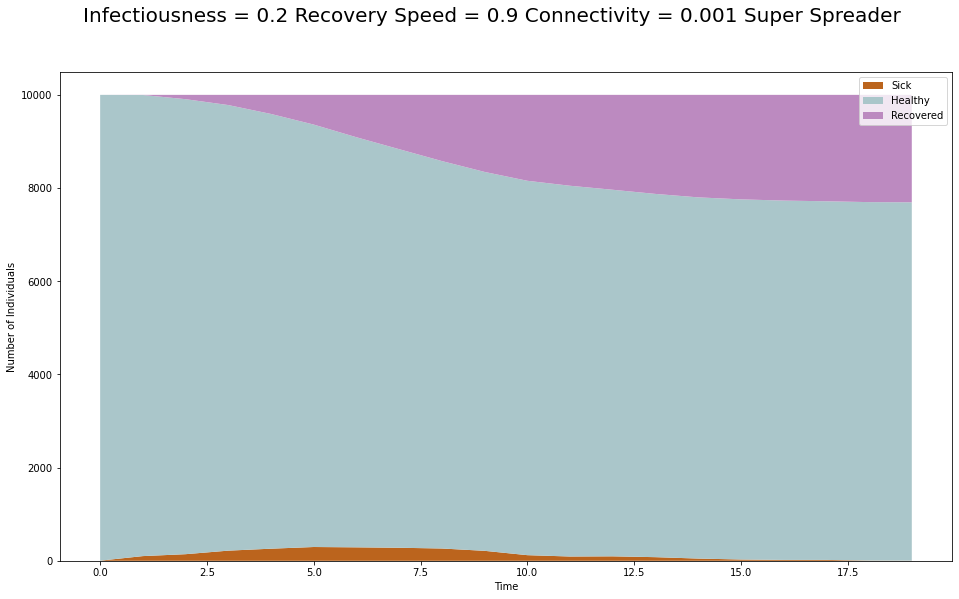

In [241]:
  alpha = infectiousness
  mu = recovery_speed
  if(Super_spreaders==True):
    m = super_spread_connectivity
    G = nx.barabasi_albert_graph(n, m)
  else:
    if(p!=connectivity):
      G = nx.erdos_renyi_graph(n, connectivity)
      p = connectivity
  init_conditions()
  degrees = [val for (node, val) in G.degree()]
  avg_deg = G.number_of_edges()/n
  num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
  x = list(range(0, len(epi_curve_data)))
generate_epidemic_graph()

In [242]:
print_stats()

R0:  0.44
Peak cases:  296
Peak time period:  5
Total time periods:  20
Average contacts:  2.0
Healthy left:  7691


In [243]:
epi_curve_data

[3,
 101,
 142,
 218,
 260,
 296,
 289,
 280,
 264,
 214,
 121,
 92,
 96,
 78,
 48,
 28,
 19,
 19,
 5,
 3]

In [244]:
rec_curve_data

[0,
 3,
 93,
 219,
 410,
 638,
 910,
 1166,
 1421,
 1654,
 1844,
 1951,
 2037,
 2126,
 2200,
 2243,
 2269,
 2284,
 2302,
 2306]

In [245]:
sup_curve_data

[9997,
 9896,
 9765,
 9563,
 9330,
 9066,
 8801,
 8554,
 8315,
 8132,
 8035,
 7957,
 7867,
 7796,
 7752,
 7729,
 7712,
 7697,
 7693,
 7691]